Problem Statement: Analysing Weather Data from OpenWeatherMap API
● Interact with the OpenWeatherMap API using the API key to retrieve weather
data for a specific location.
● Extract relevant weather attributes such as temperature, humidity, wind speed,
and precipitation from the API response.
● Clean and preprocess the retrieved data, handling missing values or
inconsistent formats.
● Perform data modelling to analyse weather patterns, such as calculating
average temperature, maximum/minimum values, or trends over time.
● Visualise the weather data using appropriate plots, such as line charts, bar plots,
or scatter plots, to represent temperature changes, precipitation levels, or wind
speed variations.
● Apply data aggregation techniques to summarise weather statistics by specific
time periods (e.g., daily, monthly, seasonal).
● Explore and visualise relationships between weather attributes, such as
temperature and humidity, using correlation plots or heatmaps.

In [2]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = 'https://api.openweathermap.org/data/2.5/forecast?lat=44.34&lon=10.99&appid=3642eecbd3f0823ca8a3abf3fbdcee16' # <-- This is app id also known as api key, which you have to generate your own, and paste it here

#vurl ='https://api.openweathermap.org/data/2.5/weather?lat=44.34&lon=10.99&appid=307d11bca480dd730d99187c926&city_name=London'
response = requests.get(url)
data = response.json()
pretty_json = json.dumps(data,indent=4)
print(pretty_json)

{
    "cod": "200",
    "message": 0,
    "cnt": 40,
    "list": [
        {
            "dt": 1730829600,
            "main": {
                "temp": 281.01,
                "feels_like": 281.01,
                "temp_min": 280.22,
                "temp_max": 281.01,
                "pressure": 1025,
                "sea_level": 1025,
                "grnd_level": 938,
                "humidity": 92,
                "temp_kf": 0.79
            },
            "weather": [
                {
                    "id": 804,
                    "main": "Clouds",
                    "description": "overcast clouds",
                    "icon": "04n"
                }
            ],
            "clouds": {
                "all": 98
            },
            "wind": {
                "speed": 0.74,
                "deg": 216,
                "gust": 0.79
            },
            "visibility": 10000,
            "pop": 0,
            "sys": {
                "pod": "n"
            },
     

In [4]:
data_struct = []
for record in data['list']:
    temp = record['main']['temp']
    humid = record['main']['humidity']
    wind_speed = record['wind']['speed']
    desp =record['weather'][0]['description']
    date_time = record['dt_txt']

    data_struct.append({'Temperature':temp,'Humidity':humid,'Wind Speed':wind_speed,'Weather Description':desp,'Date Time':date_time})

data_df = pd.DataFrame(data_struct)
data_df[['Date','Time']] = data_df['Date Time'].str.split(' ',expand=True)
data_df.head(10)

,Temperature,Humidity,Wind Speed,Weather Description,Date Time,Date,Time
0,281.01,92,0.74,overcast clouds,2024-11-05 18:00:00,2024-11-05,18:00:00
1,280.15,91,1.08,scattered clouds,2024-11-05 21:00:00,2024-11-05,21:00:00
2,278.90,89,0.90,few clouds,2024-11-06 00:00:00,2024-11-06,00:00:00
3,278.44,86,0.96,broken clouds,2024-11-06 03:00:00,2024-11-06,03:00:00
4,278.08,84,0.98,broken clouds,2024-11-06 06:00:00,2024-11-06,06:00:00
5,282.80,70,1.05,scattered clouds,2024-11-06 09:00:00,2024-11-06,09:00:00
6,284.79,63,1.76,scattered clouds,2024-11-06 12:00:00,2024-11-06,12:00:00
7,282.96,80,1.44,scattered clouds,2024-11-06 15:00:00,2024-11-06,15:00:00
8,279.36,90,0.71,broken clouds,2024-11-06 18:00:00,2024-11-06,18:00:00
9,278.85,88,0.92,overcast clouds,2024-11-06 21:00:00,2024-11-06,21:00:00


In [5]:
data_df.shape

(40, 7)

In [6]:
data_df.isnull().sum()

Temperature            0
Humidity               0
Wind Speed             0
Weather Description    0
Date Time              0
Date                   0
Time                   0
dtype: int64

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Temperature          40 non-null     float64
 1   Humidity             40 non-null     int64  
 2   Wind Speed           40 non-null     float64
 3   Weather Description  40 non-null     object 
 4   Date Time            40 non-null     object 
 5   Date                 40 non-null     object 
 6   Time                 40 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 2.3+ KB


In [8]:
data_df.describe()

,Temperature,Humidity,Wind Speed
count,40.000000,40.00000,40.000000
mean,279.897750,82.52500,1.134750
std,2.327155,9.15672,0.349028
min,277.090000,59.00000,0.410000
25%,277.922500,79.00000,0.975000
50%,278.965000,84.00000,1.080000
75%,282.095000,90.25000,1.260000
max,284.790000,93.00000,2.010000


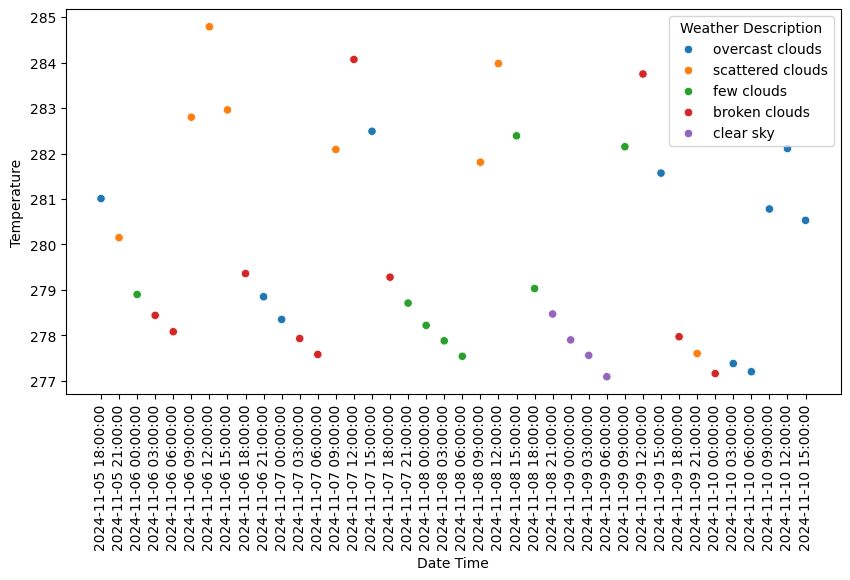

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10,5))
sns.scatterplot(x=data_df['Date Time'],
                y=data_df['Temperature'],
                hue=data_df['Weather Description'])

plt.xticks(rotation=90);

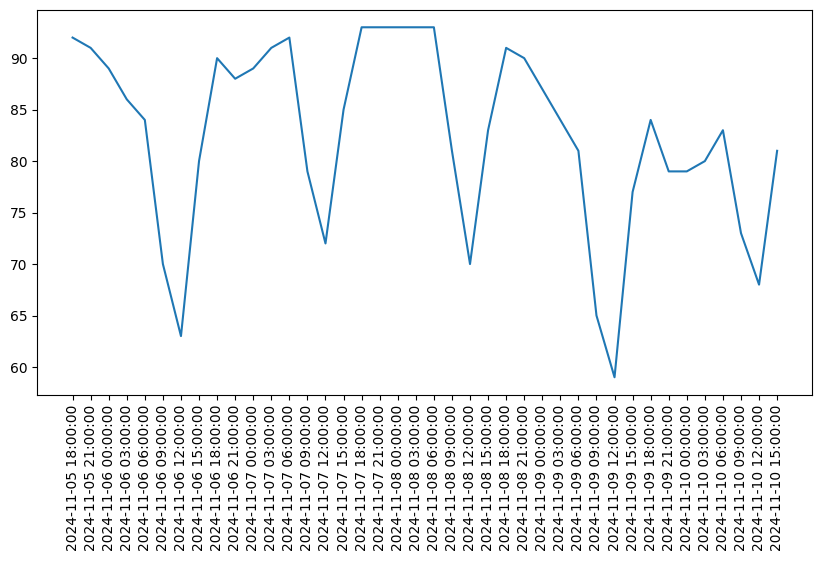

In [10]:

plt.figure(figsize=(10,5))
plt.plot(data_df['Date Time'],data_df['Humidity'])
plt.xticks(rotation=90);

In [11]:
data_df.groupby('Date').agg({'Temperature' : 'mean','Wind Speed':'mean'})

,Temperature,Wind Speed
Date,,
2024-11-05,280.580000,0.91000
2024-11-06,280.522500,1.09000
2024-11-07,280.062500,1.18000
2024-11-08,279.915000,1.20500
2024-11-09,279.448750,1.17625
2024-11-10,279.193333,1.06000


<Axes: >

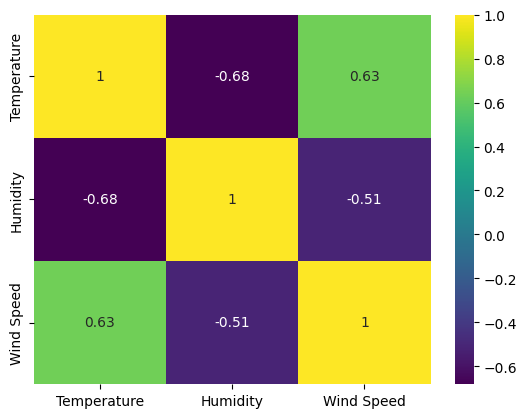

In [12]:
sns.heatmap(data_df[['Temperature','Humidity','Wind Speed']].corr(),annot=True,cmap='viridis')